In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Simple-Linear-Regression Dataset from kaggle

In [74]:
df = pd.read_csv("/content/tvmarketing.csv")


In [75]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


# Nurmalization

In [76]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ["TV", "Sales"]

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

display(df.head())

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882


# Simple linear regression model

In [77]:
X = df[["TV"]]   # feature
y = df["Sales"]    # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)



Mean Squared Error (MSE): 0.015817245518632516
R-squared (R²): 0.6766954295627077
Coefficient (Slope): 0.541686703019669
Intercept: 0.21859091512546325


Intercept (0.219): baseline normalized sales when TV advertising = 0.

Slope (0.542): for every 1 unit increase in normalized TV advertising, the normalized sales increase by 0.542.

R² = 0.677: ~67.7% of sales variation (after scaling) is explained by TV advertising.

MSE = 0.0158: prediction error is small in the scaled range (0–1), meaning the fit is fairly accurate.

# Visualization


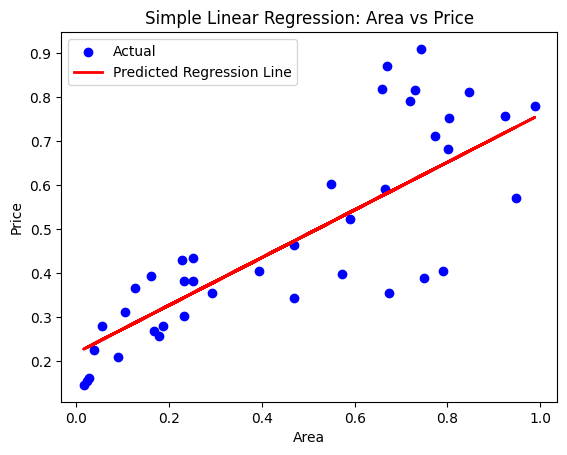

In [78]:
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()